In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


# df
df = pd.read_csv("ZIONO_weekly_return_detailed.csv")
# print(df.head(22))

df_21 = df[["Adj Close", "Date", "Year"]]
df_21 = df_21[df_21.Year == 2021]

df_22 = df[["Adj Close", "Date", "Year"]]
df_22 = df_22[df_22.Year == 2022]


df_21.head()

,Adj Close,Date,Year
5,23.778490,2021-01-04,2021
6,23.902563,2021-01-05,2021
7,23.583511,2021-01-06,2021
8,23.601234,2021-01-07,2021
9,23.618958,2021-01-08,2021


result L=2.849109866601171 - L1+L2=1.3152445443838716 p=6.521554962723997e-07 f=42.59731408166547
result L=29.429183416802744 - L1+L2=1.4667329041373658 p=3.1674662892555716e-13 f=340.5414463329446
result L=3.297051293278041 - L1+L2=1.232938911284954 p=2.0947499068668662e-08 f=51.59778714315555
result L=0.8407350041341601 - L1+L2=0.2934244623217046 p=6.479396807979043e-08 f=51.08277691943584
result L=9.986748624039938 - L1+L2=1.9978376930655108 p=6.850409128844603e-11 f=141.1507527490569
result L=6.962962438770328 - L1+L2=0.7471751758728741 p=2.8743452062940378e-11 f=124.51066740320172
result L=0.8274129065121424 - L1+L2=0.2777443471605161 p=2.4656254743460337e-06 f=30.33221889372872
result L=0.32287329371248213 - L1+L2=0.1418850762291619 p=0.00026337329664349873 f=13.488306955468248
result L=7.131856358282731 - L1+L2=0.7550586779512747 p=1.8174350913113813e-13 f=259.60561120956373
result L=28.94065880232995 - L1+L2=3.79339423561772 p=1.1102230246251565e-16 f=732.3287876550312
result L

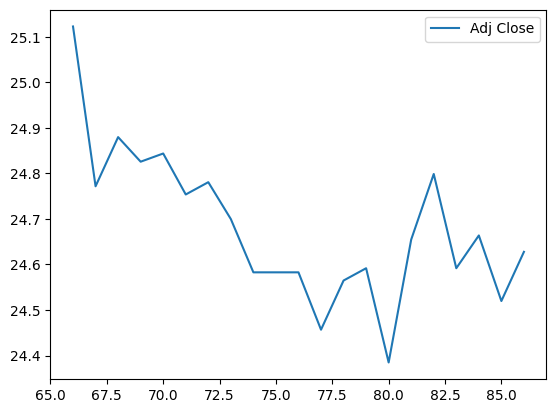

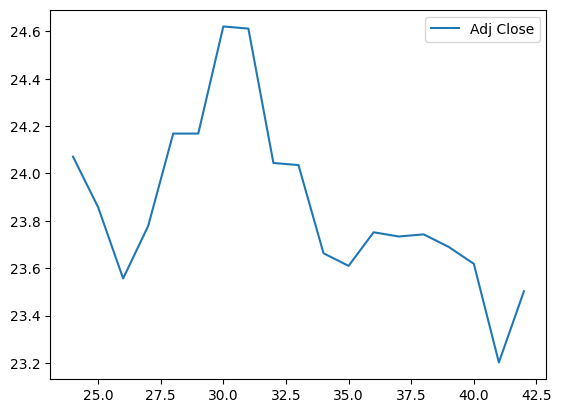

In [25]:
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error #MSE
from scipy . stats import f as fisher_f
from scipy.stats import f_oneway


# 21
p_list_21 = []
null_valid_21 = []
for month in range(1, 13):
    
    df_21["map_date"] = pd.to_datetime(df_21.Date)
    df_21["month"] = df_21.map_date.dt.month
    df_21["month_day"] = df_21.map_date.dt.day
    df_m = df_21[df_21.month == month].copy()
    # rank: 1, 2, 3, 4
    
    df_m['rank'] = df_m['month_day'].rank(method='min')
#     print(df_m['rank'].max())

    # how many days
    day_num, col_ = df_m.shape


    min_L1_add_L2 = 1000
    min_k = -1
    for k in range(2, day_num-1):

        # 0->k
        lr = LinearRegression()
        lr.fit(df_m[['rank']].iloc[:k] , df_m['Adj Close'].iloc[:k])

        y_pred = lr.predict(df_m[['rank']].iloc[:k])

        mse = mean_squared_error(df_m['Adj Close'].iloc[:k],y_pred)
        L1 = mse * k

        # k->day_num
        lr = LinearRegression()
        lr.fit(df_m[['rank']].iloc[k:] , df_m['Adj Close'].iloc[k:])

        # make predictions for year 2 data
        y_pred = lr.predict(df_m[['rank']].iloc[k:])

        mse = mean_squared_error(df_m['Adj Close'].iloc[k:],y_pred)
        L2 = mse * (day_num - k)

        if L1 + L2 < min_L1_add_L2:            
            min_L1_add_L2 = L1 + L2
            min_k = k


    # whole month regression
    lr = LinearRegression()
    lr.fit(df_m[['rank']].iloc[:min_k] , df_m['Adj Close'].iloc[:min_k])

    y_pred = lr.predict(df_m[['rank']].iloc[:])

    mse = mean_squared_error(df_m['Adj Close'].iloc[:],y_pred)
    L = mse * (day_num)
    
    f_stat = (L - min_L1_add_L2) * (day_num - 4) / (min_L1_add_L2 * 2)
    p_value = 1 - fisher_f.cdf(f_stat, 2, day_num - 4)


    print(f"result L={L} - L1+L2={ L1 + L2} p={p_value} f={f_stat}" )
    p_list_21.append((p_value, f_stat))
    null_valid_21.append(p_value < 0.1)
    
# print(p_list_21)
print(null_valid_21)

df_mm = df_21[df_21.month == 4].copy()
df_mm[["Adj Close"]].plot()
plt.show()

df_mm = df_21[df_21.month == 2].copy()
df_mm[["Adj Close"]].plot()
plt.show()

result L=1.222635641687914 - L1+L2=0.8816868234505302 p=2.6034804192054395e-05 f=21.93268652830145
result L=1.0262774564348995 - L1+L2=0.34686688944745275 p=0.0002929108267890612 f=14.690301690435017
result L=1.6332147308335105 - L1+L2=0.399965220982858 p=9.066111065214599e-07 f=31.59458026354211
result L=0.3199235135412893 - L1+L2=0.19615548200429375 p=0.00027824792762976003 f=14.26055534486463
result L=4.940855297769877 - L1+L2=0.6771218880209888 p=4.384159701942281e-12 f=175.86062583699996
result L=0.27902182565033357 - L1+L2=0.13411283760919135 p=2.304145264997448e-05 f=21.35423874165582
result L=0.24873426227151552 - L1+L2=0.07055225043741833 p=4.189884721539361e-05 f=20.204261179977436
result L=1.3307534920195438 - L1+L2=0.6831484188120703 p=6.13919638303706e-06 f=24.100322410064642
result L=0.0968610010081526 - L1+L2=0.0659675438685179 p=0.03819808349045439 f=3.980660341247213
result L=1.4550147252368042 - L1+L2=0.077268416456655 p=6.213918268827001e-13 f=223.50071941033403
resu

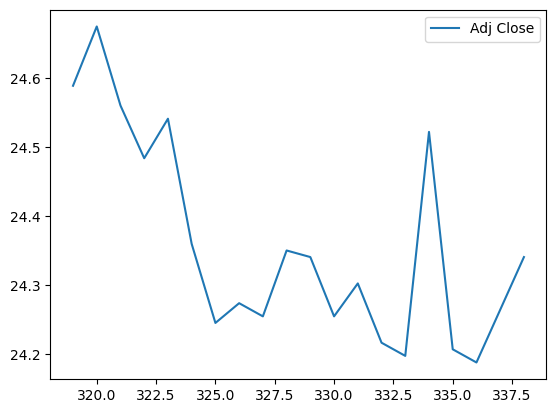

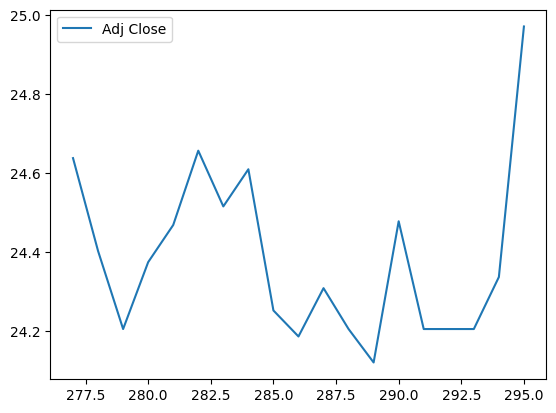

In [27]:

from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error #MSE
from scipy . stats import f as fisher_f
from scipy.stats import f_oneway


# 22
p_list_22 = []
null_valid_22 = []
for month in range(1, 13):
    
    df_22["map_date"] = pd.to_datetime(df_22.Date)
    df_22["month"] = df_22.map_date.dt.month
    df_22["month_day"] = df_22.map_date.dt.day
    df_m = df_22[df_22.month == month].copy()
    # rank: 1, 2, 3, 4
    
    df_m['rank'] = df_m['month_day'].rank(method='min')
#     print(df_m['rank'].max())

    # how many days
    day_num, col_ = df_m.shape


    min_L1_add_L2 = 1000
    min_k = -1
    for k in range(2, day_num-1):

        # 0->k
        lr = LinearRegression()
        lr.fit(df_m[['rank']].iloc[:k] , df_m['Adj Close'].iloc[:k])

        y_pred = lr.predict(df_m[['rank']].iloc[:k])

        mse = mean_squared_error(df_m['Adj Close'].iloc[:k],y_pred)
        L1 = mse * k

        # k->day_num
        lr = LinearRegression()
        lr.fit(df_m[['rank']].iloc[k:] , df_m['Adj Close'].iloc[k:])

        # make predictions for year 2 data
        y_pred = lr.predict(df_m[['rank']].iloc[k:])

        mse = mean_squared_error(df_m['Adj Close'].iloc[k:],y_pred)
        L2 = mse * (day_num - k)

        if L1 + L2 < min_L1_add_L2:            
            min_L1_add_L2 = L1 + L2
            min_k = k


    # whole month regression
    lr = LinearRegression()
    lr.fit(df_m[['rank']].iloc[:min_k] , df_m['Adj Close'].iloc[:min_k])

    y_pred = lr.predict(df_m[['rank']].iloc[:])

    mse = mean_squared_error(df_m['Adj Close'].iloc[:],y_pred)
    L = mse * (day_num)
    
    f_stat = (L - min_L1_add_L2) * (day_num - 4) / (min_L1_add_L2 * 2)
    p_value = 1 - fisher_f.cdf(f_stat, 2, day_num - 4)


    print(f"result L={L} - L1+L2={ L1 + L2} p={p_value} f={f_stat}" )
    p_list_22.append((p_value, f_stat))
    null_valid_22.append(p_value < 0.1)
    
# print(p_list_22)
print(null_valid_22)

df_mm = df_22[df_22.month == 4].copy()
df_mm[["Adj Close"]].plot()
plt.show()

df_mm = df_22[df_22.month == 2].copy()
df_mm[["Adj Close"]].plot()
plt.show()

In [28]:
count = 0
for ele in null_valid_22:
    if ele:
        count += 1
for ele in null_valid_21:
    if ele:
        count += 1
        
count

24

In [29]:
change21 = 0
change22 = 0
for ele in null_valid_22:
    if ele:
        change22 += 1
for ele in null_valid_21:
    if ele:
        change21 += 1
        
change21, change22, change21 > change22

(12, 12, False)